In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
from scipy.stats import stats

In [2]:
# Connect to database
conn = sqlite3.connect('maininventory.db')


#fetch the data
df=pd.read_sql_query("SELECT * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRation
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [204]:
df.shape

(8564, 19)

In [208]:
df.to_csv('table_data.csv', index=False)


## Exploratory Data Analysis

In [6]:
# Summary Statistics
df.describe().T


C:\Users\Arvind\anaconda3\envs\venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalExciseTax,10692.0,1.774226e+03,10975.582240,0.00,4.800000,46.570000,418.650000,3.682428e+05


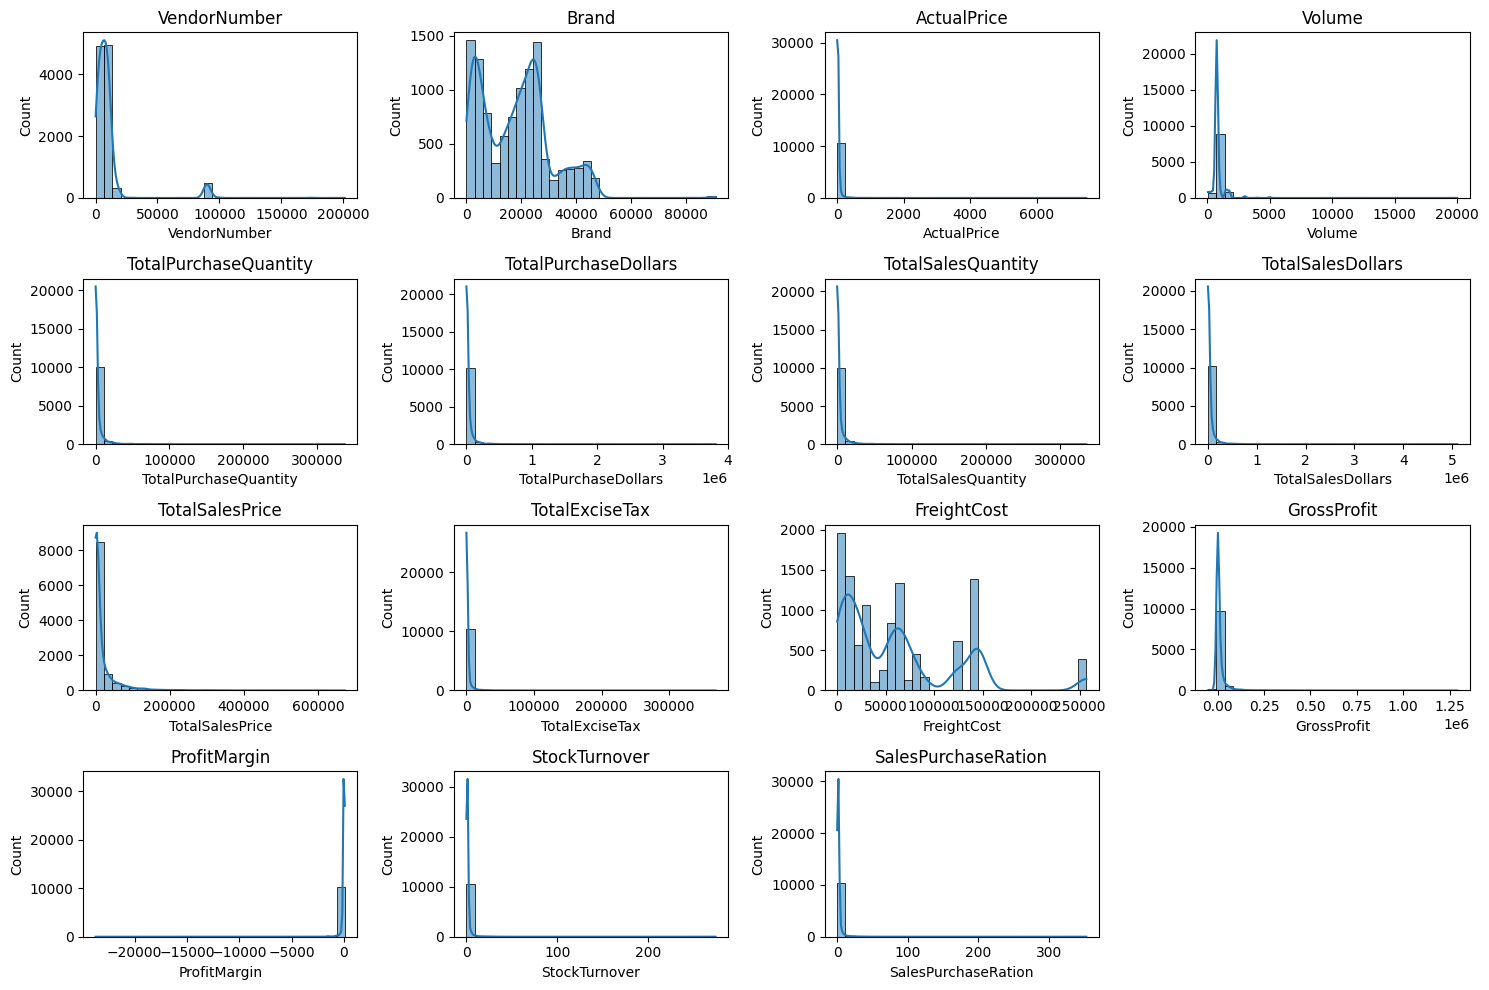

In [8]:
# Distribution plots for Numerical Colums
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #Adjusted layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

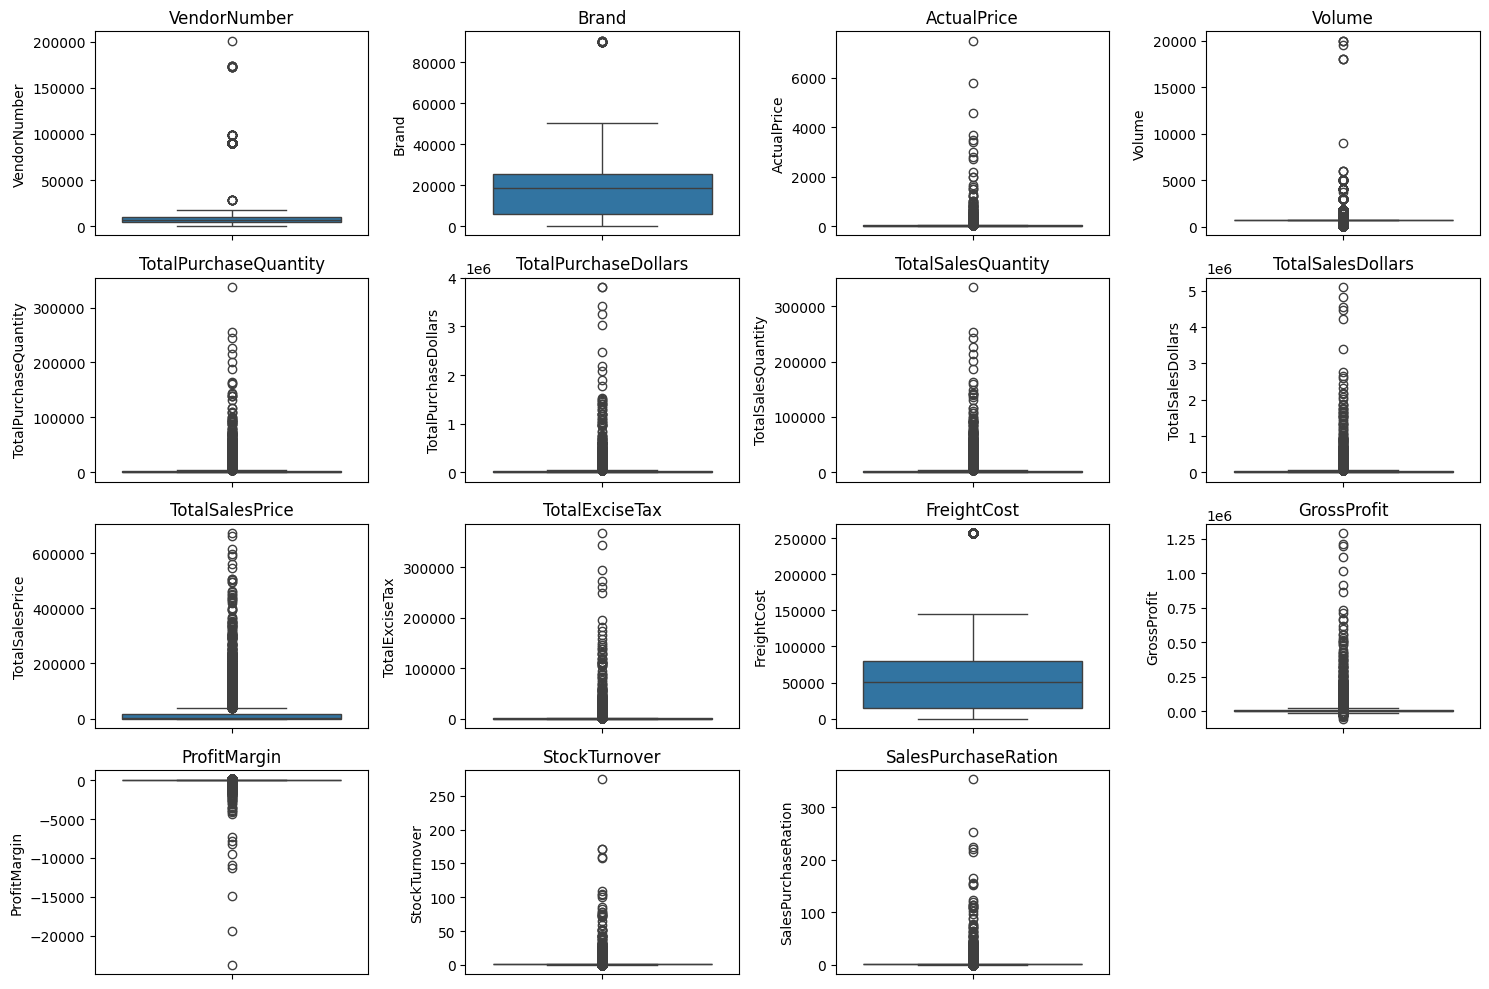

In [9]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
# Filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

In [12]:
df.shape

(8564, 17)

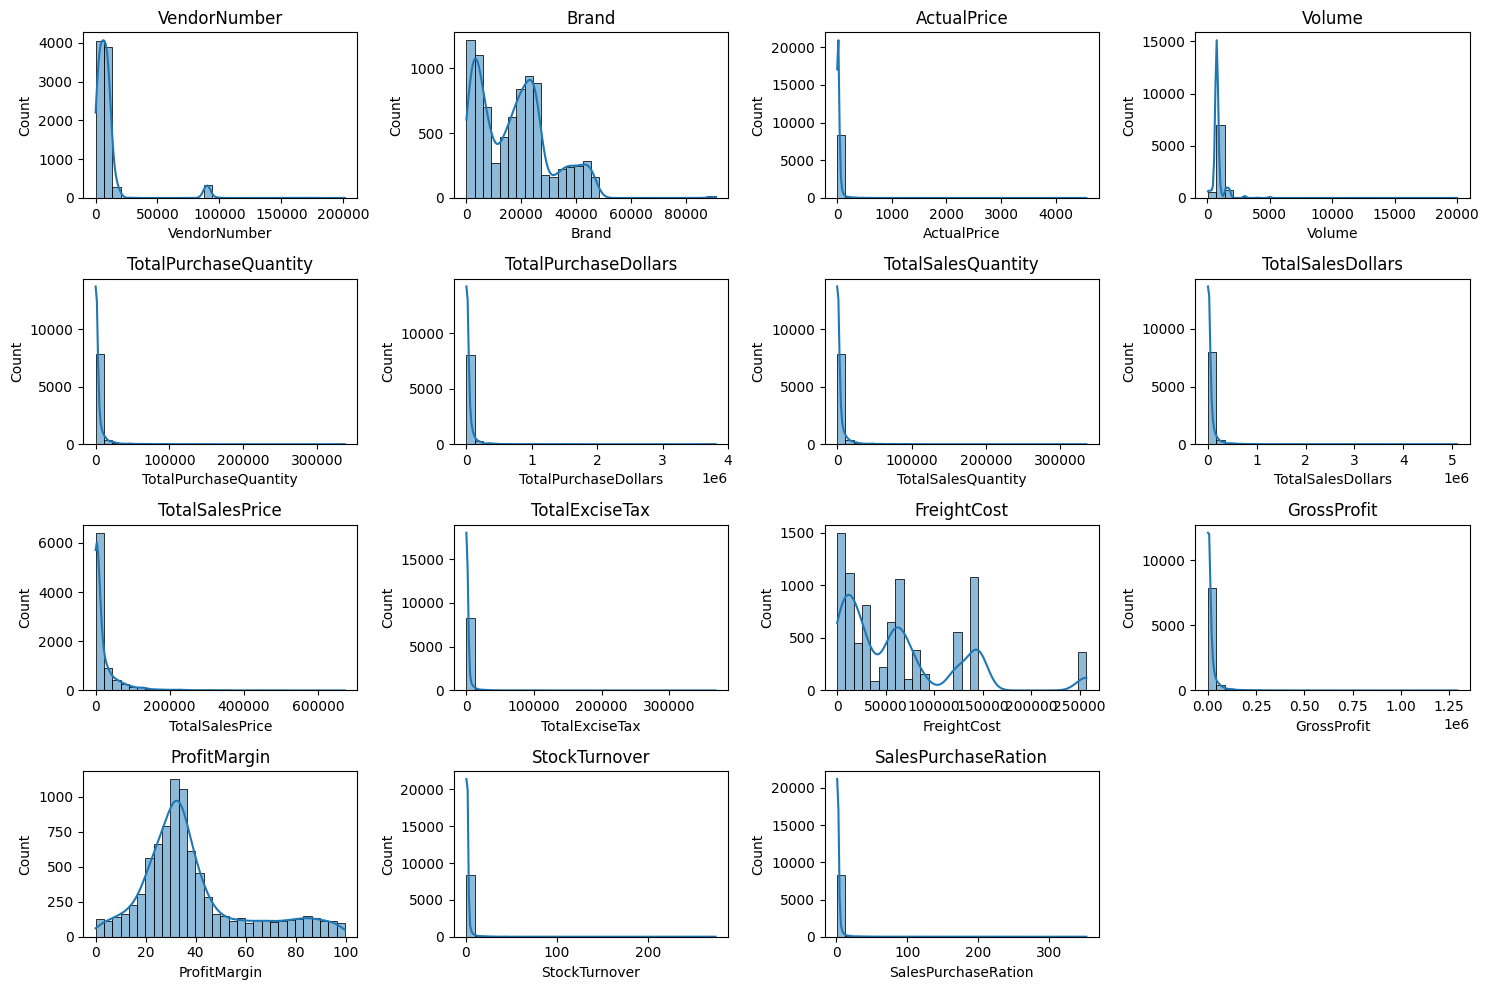

In [16]:
# Distribution plots for Numerical Colums
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #Adjusted layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

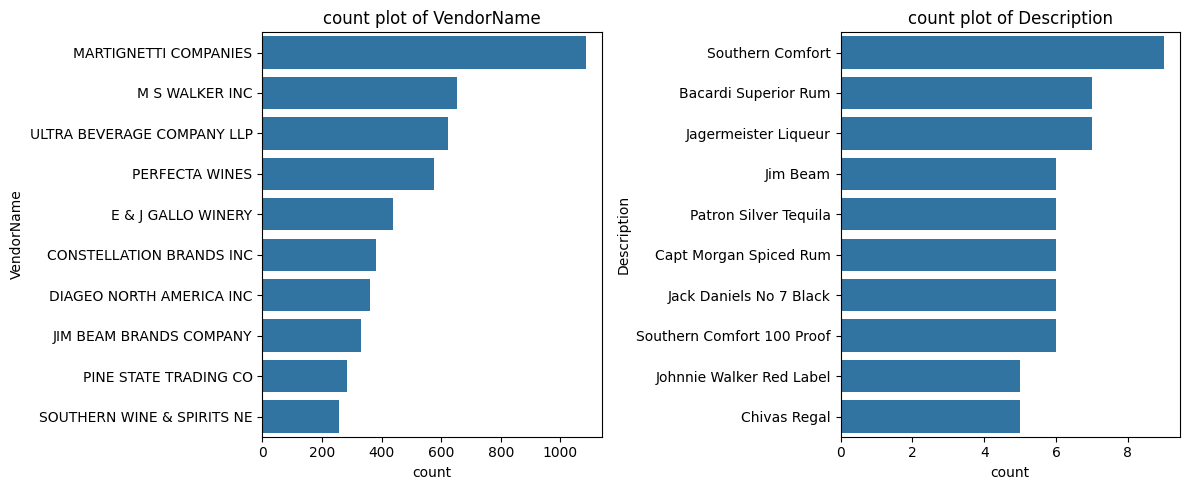

In [17]:
# Count plot for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"count plot of {col}")

plt.tight_layout()
plt.show()

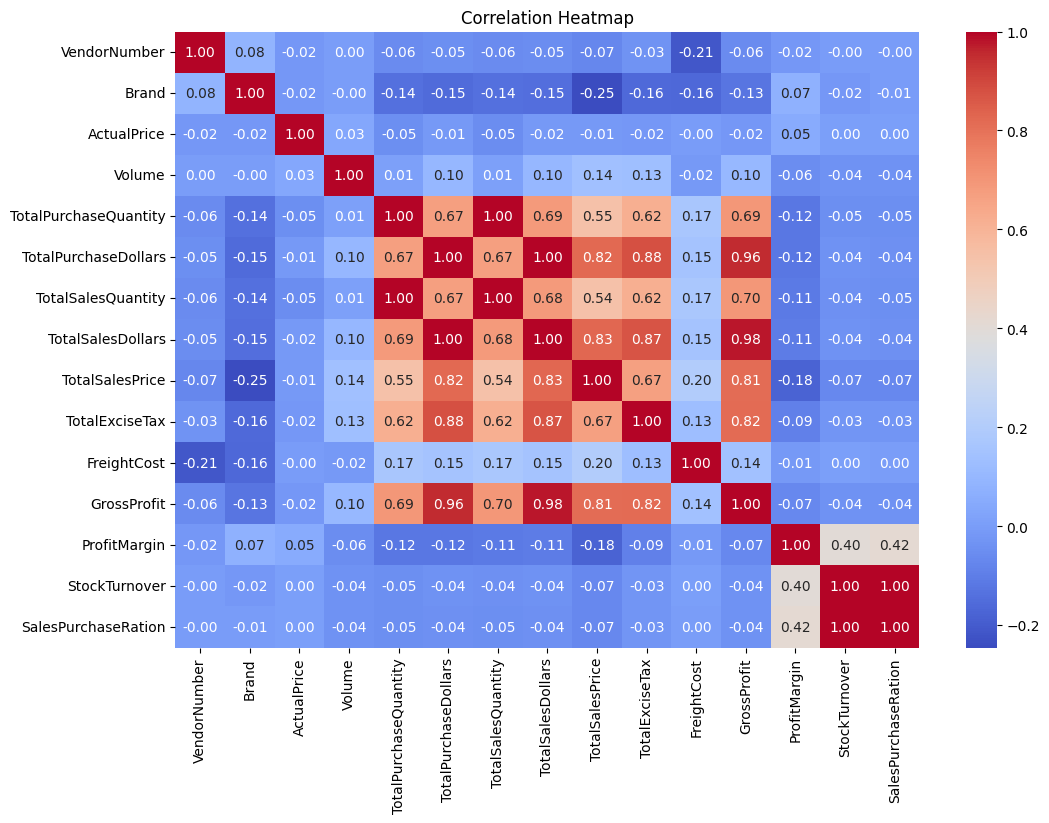

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot = True,fmt = ".2f",cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Data Analysis

#### Identify Brands that needs Promotional or Pricing Adjustment which exibit lower sales performance but higher profit margins.


In [21]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [24]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [26]:
low_sales_threshold

np.float64(560.299)

In [30]:
high_margin_threshold

np.float64(64.97017552750113)

In [32]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
(brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
(brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


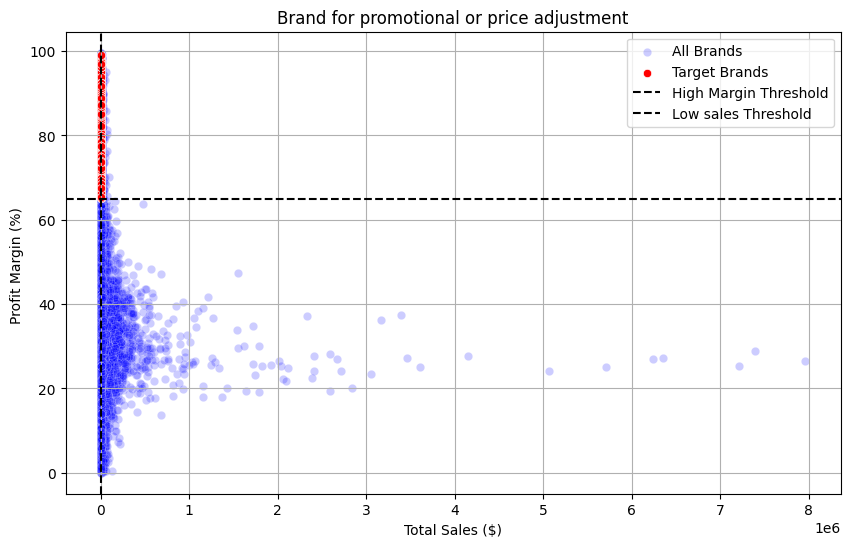

In [34]:
# scatter plot for above distribution
plt.figure(figsize=(10,6))
sns.scatterplot(data= brand_performance, x='TotalSalesDollars' , y='ProfitMargin',color = "blue", label = "All Brands",alpha = 0.2)
sns.scatterplot(data= target_brands, x='TotalSalesDollars' , y='ProfitMargin',color = "red", label = "Target Brands")


plt.axhline(high_margin_threshold, linestyle = '--',color = 'black', label = "High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle = '--',color = 'black', label = "Low sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%) " )
plt.title("Brand for promotional or price adjustment")
plt.legend()
plt.grid(True)
plt.show()

#### Which vendors and brands demonstrate the highest sales performance?


In [37]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}k"
    else:
        return str(value)

In [66]:
# Top vendors & brands by sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [41]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

C:\Users\Arvind\AppData\Local\Temp\ipykernel_14284\2394885730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_vendors.index,x = top_vendors.values, palette="Blues_r")
C:\Users\Arvind\AppData\Local\Temp\ipykernel_14284\2394885730.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y=top_brands.index.astype(str),x = top_brands.values, palette="Reds_r")


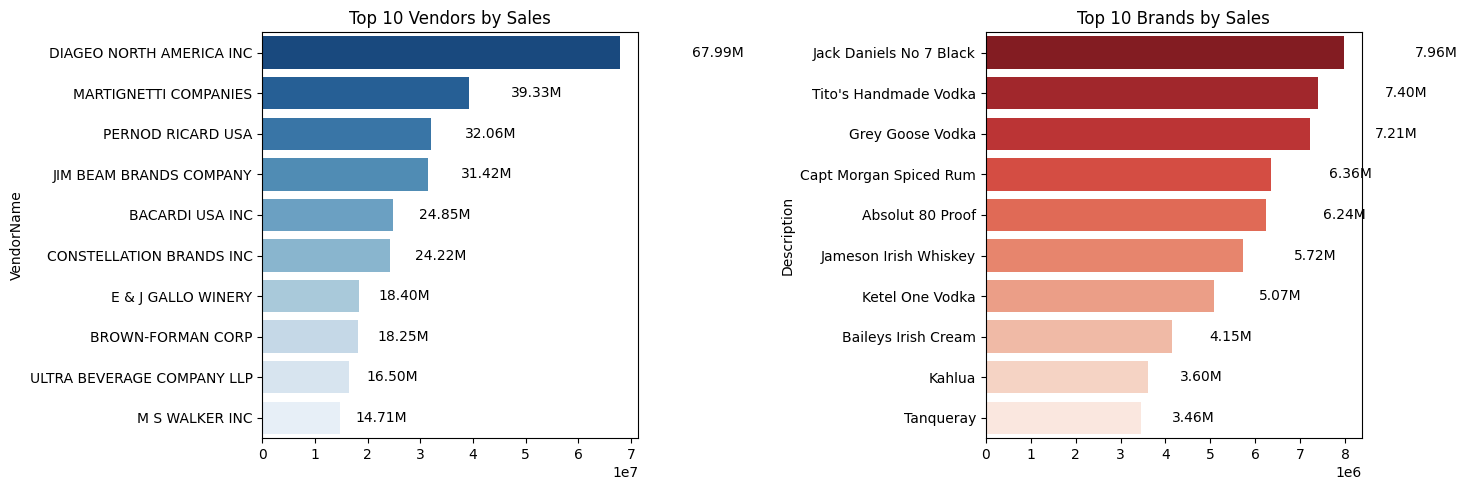

In [43]:
# Barplot for top_brand and top_vendor
plt.figure(figsize=(15,5))

#Plot for Top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index,x = top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.2),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10,color='black')

# plot for top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str),x = top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.2),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10,color='black')

plt.tight_layout()
plt.show()

#### Which vendors contribute the most tot total purchase dollars?

In [56]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'}).reset_index()

In [131]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [133]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [135]:
# Display Top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

C:\Users\Arvind\AppData\Local\Temp\ipykernel_14284\4209712051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
C:\Users\Arvind\AppData\Local\Temp\ipykernel_14284\4209712051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
C:\Users\Arvind\AppData\Local\Temp\ipykernel_14284\4209712051.py:5: SettingWithCopyWarning: 
A val

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [137]:
top_vendors.head()

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67


C:\Users\Arvind\AppData\Local\Temp\ipykernel_14284\661135749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors.loc[:,'Cumulative_Contribution']=top_vendors['PurchaseContribution%'].cumsum()
C:\Users\Arvind\AppData\Local\Temp\ipykernel_14284\661135749.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)


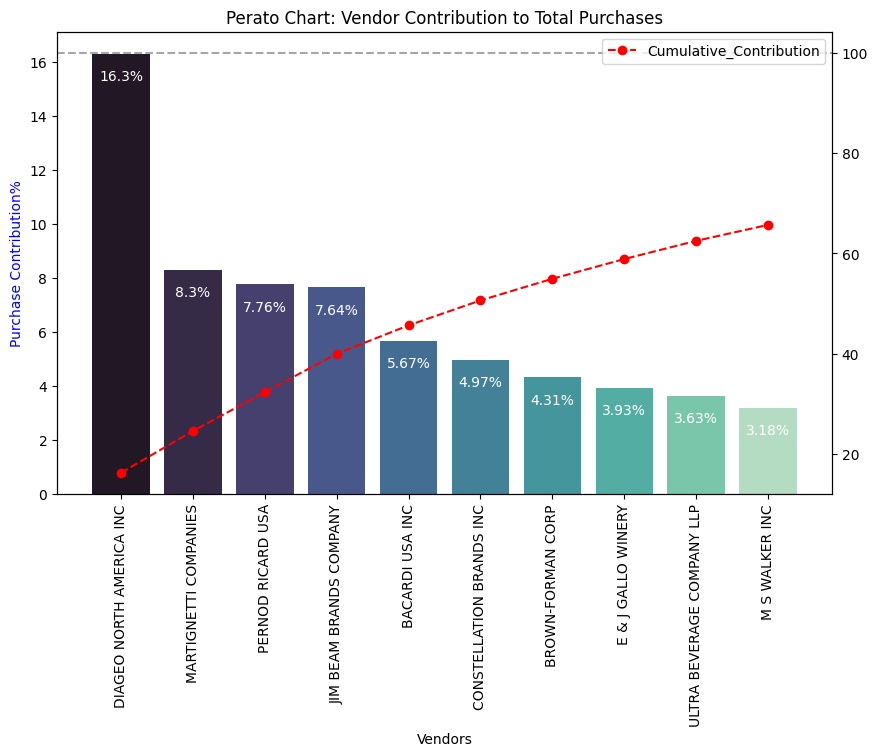

In [139]:
top_vendors.loc[:,'Cumulative_Contribution']=top_vendors['PurchaseContribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for purchase contribution
# sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako",ax=ax1)
sns.barplot(x='VendorName', hue='VendorName', y='PurchaseContribution%', data=top_vendors, palette='mako', legend=False, ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1,str(value)+'%',ha = 'center', fontsize=10,color='white')

#Line plot for Cummulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution'],color='red',marker='o',linestyle='dashed',label='Cumulative_Contribution')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution%',color='blue')
ax2.set_xlabel('Cummulative Contribution %',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Perato Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

#### How much of total procurement is dependent on the top vendors?


In [147]:
print(f"Total Purchase contribution of the top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase contribution of the top 10 vendors is 65.69%


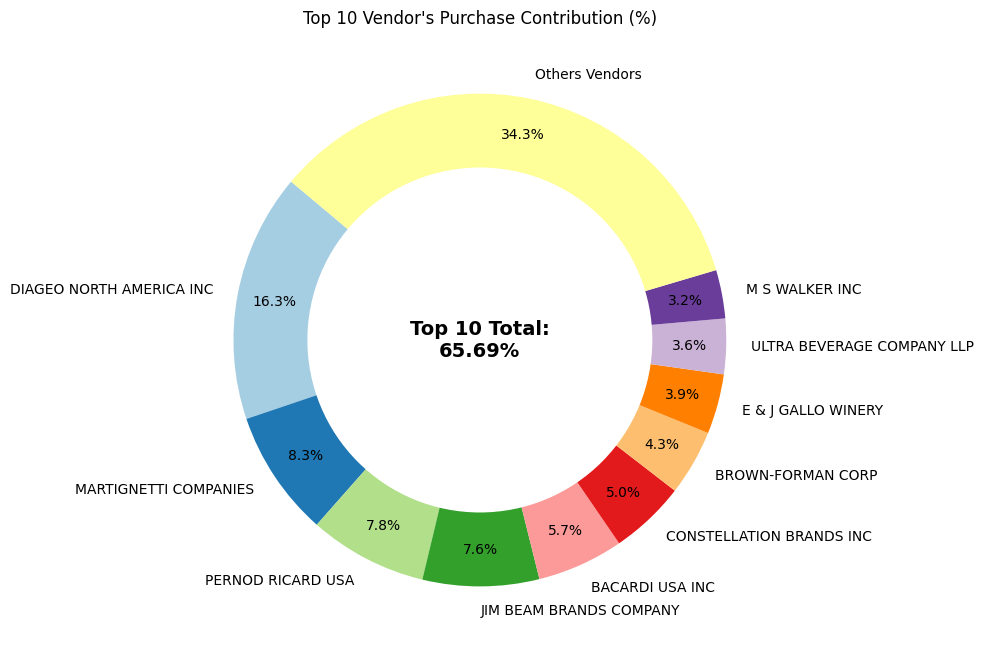

In [153]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

#Append "Other Vendors" category
vendors.append("Others Vendors")
purchase_contributions.append(remaining_contribution)

#Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors = plt.cm.Paired.colors)

# Draw a white circle in the centre to create a "donut" effect
centre_circle = plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotatio in the center to create a "donut" effect
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14, fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

#### Does purchasing in bulk reduce the unit price , and what is the optimal purchase volume for the cost savings?

In [156]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [158]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3, labels=['Small','Medium','Large'])

In [162]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


C:\Users\Arvind\AppData\Local\Temp\ipykernel_14284\1894403991.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


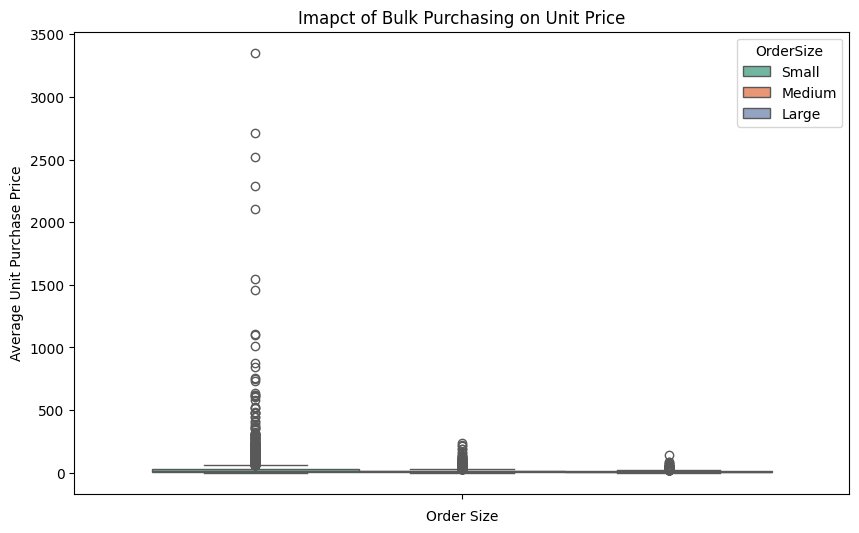

In [166]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,hue='OrderSize',y='UnitPurchasePrice',palette='Set2')
plt.title('Imapct of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

. Vendors buying in bulk (Large order size) get the lowest unit price($10.78 per unit), meaning  higher margins if they can manage inventory efficiently.

. The price difference between Small  and Large orders is susbstantial (~ 72% reduction  in unit cost)

. this suggest that bulk pricing strategies successfully encourage vendor to purchases in larger volumes, leading to higher overrall sales despite lower per - unit revenue

#### Which vendor have low inventory turnover, indicating excess stock and slow-moving products?


In [170]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### What is the 95% confidence intervels for profit margins of top-performing and low -performing vendors.

In [184]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [189]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [191]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [196]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1+confidence) / 2, df=len(data)-1)
    margin_of_error = t_critical * stf_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower: .2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower: .2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

# Top Vendors Plot
sns.histplot(top_vendors,